<a href="https://colab.research.google.com/github/shweta-todgire/Data-Science-Codes/blob/main/DimensionalityRecuction_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving TSLA.csv to TSLA.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [5]:
# Load dataset from CSV
df = pd.read_csv("/content/TSLA.csv")
# Preview dataset
print(df.head())

         Date   Open   High    Low  Close  Adj Close    Volume
0  2010-06-29  3.800  5.000  3.508  4.778      4.778  93831500
1  2010-06-30  5.158  6.084  4.660  4.766      4.766  85935500
2  2010-07-01  5.000  5.184  4.054  4.392      4.392  41094000
3  2010-07-02  4.600  4.620  3.742  3.840      3.840  25699000
4  2010-07-06  4.000  4.000  3.166  3.222      3.222  34334500


In [6]:
# Drop non-numeric columns
numeric_features = df.drop(columns=['Date'], errors='ignore')

# Convert to NumPy array
X = numeric_features.values

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA to retain 99% variance
pca = PCA(n_components=0.99, whiten=True)
X_pca = pca.fit_transform(X_scaled)

print("Original feature count:", X_scaled.shape[1])
print("Reduced feature count (PCA):", X_pca.shape[1])
print("PCA explained variance ratio:", pca.explained_variance_ratio_)

Original feature count: 6
Reduced feature count (PCA): 2
PCA explained variance ratio: [0.83476107 0.16498429]


In [7]:
kpca = KernelPCA(kernel="rbf", gamma=0.1, n_components=2)
X_kpca = kpca.fit_transform(X_scaled)

print("Original feature count:", X_scaled.shape[1])
print("Reduced feature count (Kernel PCA):", X_kpca.shape[1])

Original feature count: 6
Reduced feature count (Kernel PCA): 2


In [8]:
# Random dummy labels (LDA requires supervised labels)
y = np.random.choice([0, 1], size=len(df))

lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit(X_scaled, y).transform(X_scaled)

print("Reduced feature count (LDA):", X_lda.shape[1])
print("LDA explained variance ratio:", lda.explained_variance_ratio_)

Reduced feature count (LDA): 1
LDA explained variance ratio: [1.]


Text(0, 0.5, 'Feature 2')

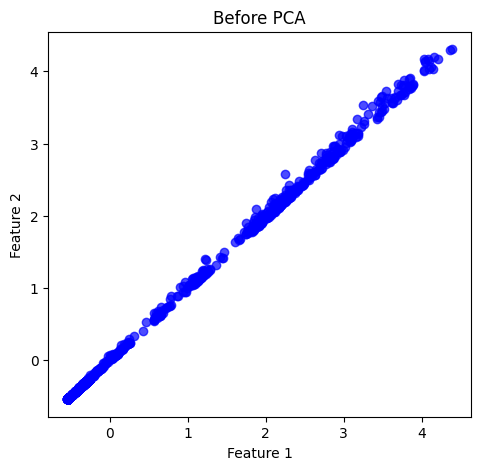

In [11]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c='blue', alpha=0.7)
plt.title("Before PCA")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

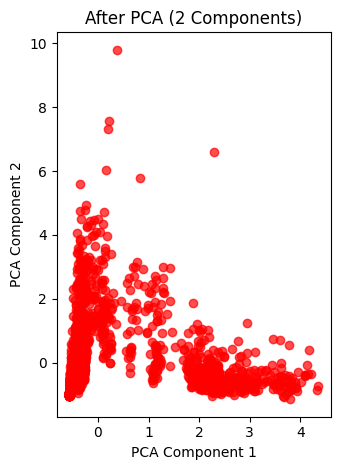

In [12]:
plt.subplot(1,2,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c='red', alpha=0.7)
plt.title("After PCA (2 Components)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

plt.tight_layout()
plt.show()